In [36]:
import pandas as pd


In [37]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [39]:
df["flight_day"].unique()#finding which days are flignt days

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [40]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [41]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [42]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [43]:
#find null values in the dataset
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [44]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [45]:
pip install pycountry-convert


In [46]:
import pycountry_convert as pc

continent = []

df['booking_origin'] = df['booking_origin'].replace('Myanmar (burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except KeyError:
        # Handle KeyError when the country code or continent code is not found
        continent.append('Unknown')
    except pc.CountryNotFoundException:
        # Handle CountryNotFoundException when the country name is not recognized
        continent.append('Unknown')

df['booking_continent'] = continent


In [47]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_continent
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,OC
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,OC
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AS
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,OC
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,OC
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,OC
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,OC
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,OC


In [48]:
df.drop('booking_origin', axis = 1, inplace = True)

In [49]:

x = df.drop('booking_complete', axis=1)
y = df.booking_complete

for colname in x.select_dtypes("object"):
    x[colname], _ = pd.factorize(x[colname])
    

In [50]:
from sklearn.feature_selection import mutual_info_classif

# Reset index to ensure alignment
x.reset_index(drop=True, inplace=True)

min_scores = mutual_info_classif(x, y)
min_scores = pd.Series(min_scores, name="MI Scores", index=x.columns)
min_scores = min_scores.sort_values(ascending=False)

min_scores

route                    0.053159
booking_continent        0.031582
flight_duration          0.016189
wants_extra_baggage      0.010192
length_of_stay           0.009318
num_passengers           0.004742
wants_preferred_seat     0.003594
wants_in_flight_meals    0.003414
trip_type                0.002952
sales_channel            0.002113
purchase_lead            0.001874
flight_hour              0.000178
flight_day               0.000000
Name: MI Scores, dtype: float64

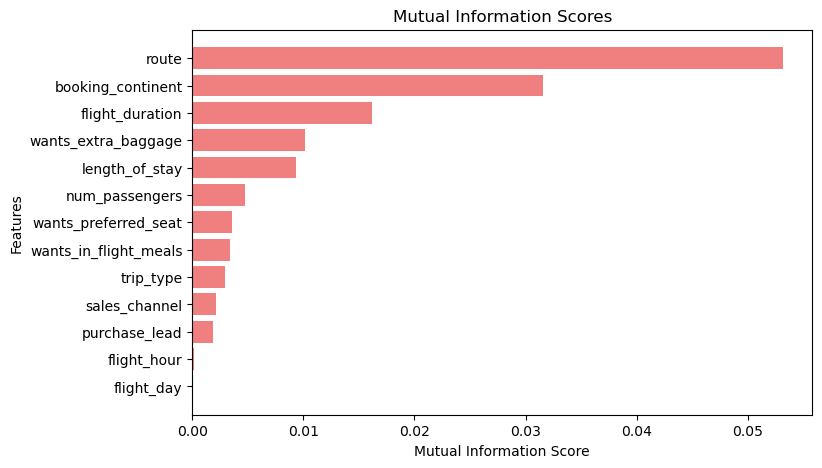

In [51]:
import matplotlib.pyplot as plt

def plot_min_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = range(len(scores))
    ticks = list(scores.index)
    plt.figure(dpi=100, figsize=(8, 5))  # Set figure size and DPI
    plt.barh(width, scores, color='lightcoral')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.show()

# Now, let's call the function to plot the mutual information scores
plot_min_scores(min_scores)

In [52]:
from sklearn.model_selection import train_test_split

def split_dataset(data, target_column, test_size=0.2, random_state=None):
    """
    Split dataset into training and testing sets.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the dataset.
    target_column (str): Name of the target column.
    test_size (float): The proportion of the dataset to include in the test split.
    random_state (int): Random seed for reproducibility.
    
    Returns:
    X_train (pd.DataFrame): Features of the training set.
    X_test (pd.DataFrame): Features of the testing set.
    y_train (pd.Series): Target variable of the training set.
    y_test (pd.Series): Target variable of the testing set.
    """
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


In [53]:
X_train, X_test, y_train, y_test = split_dataset(df, 'booking_complete', test_size=0.2, random_state=42)


In [54]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x

In [56]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df.drop('booking_complete', axis=1)
X = pd.get_dummies(X)  # Corrected method

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['booking_complete']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)  # Adjust test_size as needed

# Training the Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
preds = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, preds)
print('Accuracy:', accuracy)






Accuracy: 0.8505


In [59]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.1/99.8 MB 552.2 kB/s eta 0:03:01
   ---------------------------------------- 0.2/99.8 MB 614.4 kB/s eta 0:02:43
   ---------------------------------------- 0.2/99.8 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 654.2 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 654.2 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 654.1 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 676.8 kB/s eta 0:02:27
   ---------------------------------------- 0.4/99.8 MB 618.4 kB/s eta 0:02:41


In [60]:
from xgboost import XGBClassifier

# Assuming df is your DataFrame
X = df.drop('booking_complete', axis=1)
X = pd.get_dummies(X)  # One-hot encode categorical variables if any

y = df['booking_complete']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # Adjust test_size as needed

# Create an instance of the XGBClassifier
xgb_model = XGBClassifier(random_state=1)

# Train the classifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
preds = xgb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, preds)
print('Accuracy:', accuracy)


Accuracy: 0.85
